# Laboratorio 7

En este lab veremos:

Transformada Ondita Continua (CWT, Continuous Wavelet Transform)

Transformada Ondita Discreta (DWT, Discrete Wavelet Transform)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import math as mp
from scipy.fftpack import fft,fftshift
from scipy.io.wavfile import read, write  #para leer y guardar archivos de audio formato wav
from scipy.io import loadmat  #para leer archivos .mat

from scipy import signal
from scipy.signal import qmf, daub  #para transformada Ondita
import pywt  #para transformada Ondita

**Repaso de clase anterior**

* ¿Que pasa cuando la señal se dilata o se comprime? 
* ¿Que pasa cuando sobre muestreamos o submuestreamos?
* ¿Cuáles espectrogramas se parecen?


# Transformada Ondita (Contínua y Discreta)

- Transformada Ondita Continua  (cwt o CWT por sus siglas en inglés), 
- Transformada Ondita Discreta (dwt o DWT) no tiene redundancias y es más adecuada para el estudio digital. 


 En el abordaje con la transformada Ondita se busca descomponer la señal como suma de señales de una base Ortonormal formada por una ondita madre $\psi$ junto con escalas y traslaciones de ésta: $\psi_{a,b}$ ($a$ escala, $b$ traslación):

 $x(t)= \sum_{a,b} C_{a,b}\, \psi_{a,b}(t)$

 Donde los coeficientes son $C_{a,b}=\left \langle x(t),\psi_{a,b}(t) \right \rangle$. 
 
El PI(producto interno) nos dice que tan parecida es la señal $x(t)$ a la señal de la base y su aporte en la descomposición.

Familias de Onditas:

'haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus',
'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor'

In [2]:
print(pywt.wavelist(kind='all')) #discrete, continuos, all

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

In [2]:
print(pywt.wavelist(kind='discrete')) #discrete, continuos, all

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


In [4]:
pywt.wavelist('gaus')


['gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8']

In [5]:
pywt.wavelist('cgau') #coif

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8']

ContinuousWavelet cgau2
  Family name:    Complex Gaussian wavelets
  Short name:     cgau
  Symmetry:       symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    True


C:\Users\diezf\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


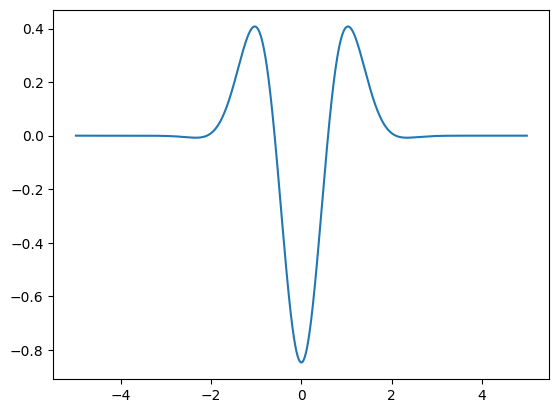

4096 muestras 4096


In [6]:
wavelet = pywt.ContinuousWavelet('cgau2')
print(wavelet)
r=12
[psi, x] = wavelet.wavefun(r)
plt.plot(x,psi)
plt.show()
print(len(x),'muestras',2**r)

# Transformada Ondita Continua: CWT

Transformada Ondita Continua  (cwt o CWT por sus siglas en inglés)


Analicemos la señal Chirp lineal usando función pywt.cwt 

In [7]:
t = np.arange(0, 2.00, 0.001) #tiempo con 1000 Hz frec  de muestreo (Período o paso 0.001s)
C1=signal.chirp(t,30,1,60) #frec inicial 30Hz y 60Hz al segundo
delta_t = 0.001  #período de muestreo, sampling_period

max_escala = 300 #p/ escalas
scales = np.arange(6,max_escala,2)
wavelet_type = 'morl'

coefs, freqs = pywt.cwt(C1, scales, wavelet_type, delta_t)

print(coefs.shape)
print(scales.shape)
print(freqs.shape)

(147, 2000)
(147,)
(147,)


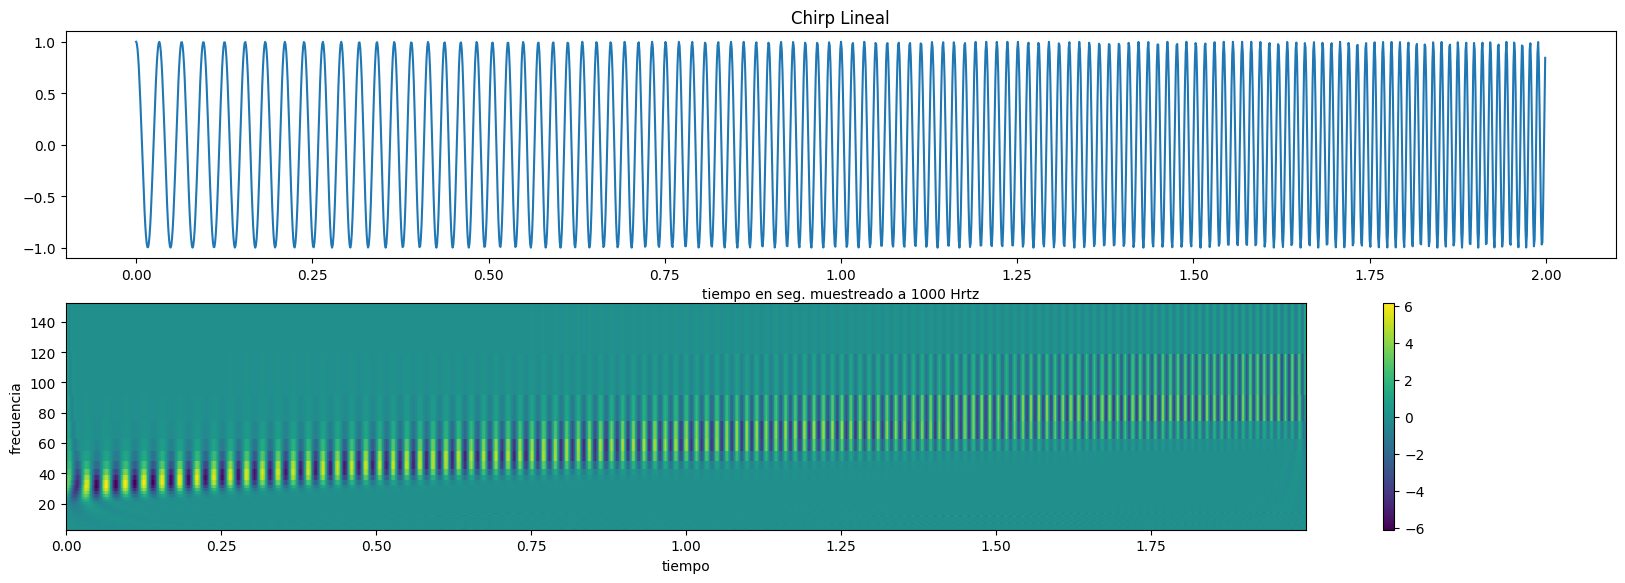

notar multiresolucion;
 a baja frecuencia (30Hz aprox, en los inicios de la señal) ver Deltaw y deltat
 al avanzar en el tiempo sube la frecuencia (70-90 Hrts) ver deltaw y deltat


In [8]:
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(t,C1)
plt.xlabel('tiempo en seg. muestreado a 1000 Hrtz')
plt.title('Chirp Lineal')

plt.subplot(312)
plt.pcolormesh(t,freqs,coefs) 
plt.xlabel('tiempo')
plt.ylabel('frecuencia') #??
plt.colorbar()

plt.show()
print('notar multiresolucion;' )
print(' a baja frecuencia (30Hz aprox, en los inicios de la señal) ver Deltaw y deltat')
print(' al avanzar en el tiempo sube la frecuencia (70-90 Hrts) ver deltaw y deltat')

In [9]:
print(scales)
print(freqs)
print('notar que a mayor escala menos frecuencia')

[  6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40
  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76
  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106 108 110 112
 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142 144 146 148
 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178 180 182 184
 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214 216 218 220
 222 224 226 228 230 232 234 236 238 240 242 244 246 248 250 252 254 256
 258 260 262 264 266 268 270 272 274 276 278 280 282 284 286 288 290 292
 294 296 298]
[135.41666667 101.5625      81.25        67.70833333  58.03571429
  50.78125     45.13888889  40.625       36.93181818  33.85416667
  31.25        29.01785714  27.08333333  25.390625    23.89705882
  22.56944444  21.38157895  20.3125      19.3452381   18.46590909
  17.66304348  16.92708333  16.25        15.625       15.0462963
  14.50892857  14.00862069  13.54166667  13.10483871  12.6953125
  12.310

# Ondita-Escala

Observación: Se trabaja con una dupla de funciones: 
* Función Ondita:   $\psi$ (psi) (Madre)
* Función Escala:   $\phi$ (phi) ("Abuela")
 

Ver pág 146-151 del archivo Apunte_oficial.pdf (pág 121-126 del apunte en papel)

In [10]:
print(pywt.wavelist(kind='discrete')) #discrete, continuos, all

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']



ver: https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html


## Escala y Ondita  Haar

**Subespacio Vectorial  $V_0$ de las señales contantes en intervalos unitarios $n \leq t < n+1$** (ver pág 147)

$V_0$ subespacio generado por $\phi(t)=\left\{\begin{matrix}
 1 &    0 \leq t < 1\\     
0    & \text{ otros } 
\end{matrix}\right.$

y sus traslaciones $\phi(t-k)$, con $k \in Z$ (ortogonales)

Wavelet haar
  Family name:    Haar
  Short name:     haar
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


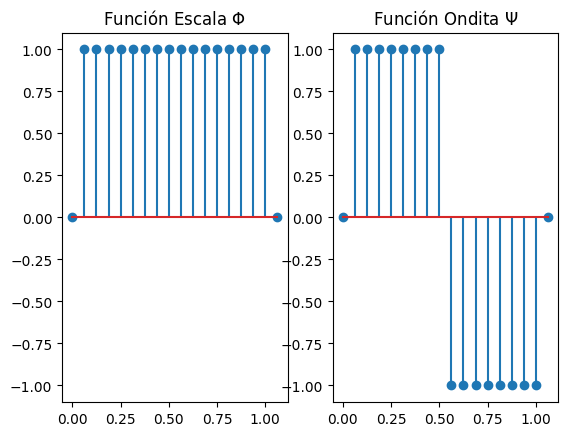

In [3]:
wavelet = pywt.Wavelet('haar') #Escala y Ondita Haar =db1
phi, psi, x = wavelet.wavefun(level=4) #level es el nivel de refinamiento (+resolucion, + muestras)
print(wavelet)

plt.subplot(121)
#plt.plot(x,phi)
plt.stem(x,phi)
plt.title('Función Escala $\Phi$')
plt.ylim((-1.1,1.1))
plt.subplot(122)
#plt.plot(x,psi)
plt.stem(x,psi)
plt.title('Función Ondita $\Psi$')

plt.show()

[Ingrid_Daubechies](https://es.wikipedia.org/wiki/Ingrid_Daubechies)

Ondículas=Onditas=Wavelets

Wavelet db3
  Family name:    Daubechies
  Short name:     db
  Filters length: 6
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


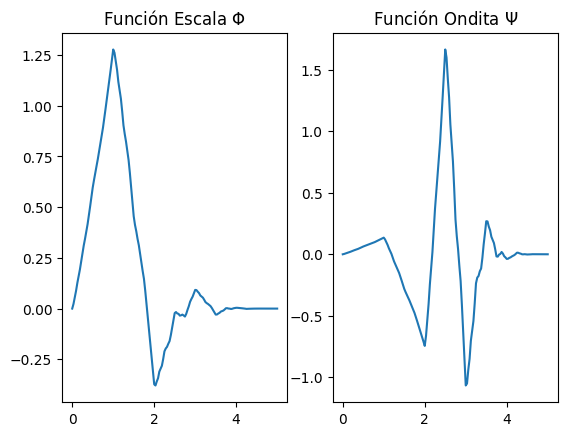

In [12]:
wavelet = pywt.Wavelet('db3')
print(wavelet)
phi2, psi2, x2 = wavelet.wavefun(5)

plt.subplot(121)
plt.plot(x2,phi2)
plt.title('Función Escala $\Phi$')
plt.subplot(122)
plt.plot(x2,psi2)
plt.title('Función Ondita $\Psi$')

plt.show()

##Ecuación Escala y Ondita: Filtros

Filtros pasa bajo y pasa alto (espejo en cuadratura)

### Ejercicio 1
Generamos los coeficientes de la ecuación escala y la ecuación ondita, es decir, los ceficientes de los filtros pasa bajo y pasa alto 

In [14]:
#Ondita Haar, se vió en el teórico (ver apunte p. 124 y 126)
#los coeficientes de la descomposición quedaron:
h=np.array([1,1])/ np.sqrt(2) #coeficiente de la ecuación de dilatación (ec. escala)
g=np.array([1,-1])/ np.sqrt(2) #coeficiente de la ecuación ondita
print(h)
print(g)

[0.70710678 0.70710678]
[ 0.70710678 -0.70710678]


####  qmf(hk)
    Return high-pass qmf filter from low-pass

g[k]=h[L-1-k] (-1)^k 

función de scipy.signal

```
# Esto tiene formato de código
```



In [15]:
#from scipy.signal import qmf, daub 
# g y h están en espejo en cuadratura
g_2 = qmf(h)
print(g_2)
muestra_qmf = qmf([1, 2, 3, 4, 5]) #para ver como funciona la función qmf (espejo en cuadratura)
print(muestra_qmf)

[ 0.70710678 -0.70710678]
[ 5 -4  3 -2  1]


In [16]:
#Filtros, función escala y función ondita
#Funciones a utilizar:

daub #Para ver ayuda de la instruccion: Ctrl+Shift+Space
#Esta función genera vector de coef. h para una ondita Daubechies

#La cantidad de coeficientes depende de la ondita Daubechies,
#Se usa h=daub('p') donde 2*p es la longitud de h. ¿Rango de valores para p??

<function scipy.signal._wavelets.daub(p)>

In [17]:
#La ondita Haar es daub('1'), h de longitud 2
h1 = daub(4) #coeficientes de escala
g1 = qmf(h1) #coeficientes de ondita 
print (h1)
print (g1)

#Pueden ver también las funciones coifwavf y symwavf, para onditas Coiflet y
#Symlet, respectivamente. ver también waveinfo

[ 0.23037781  0.71484657  0.63088077 -0.02798377 -0.18703481  0.03084138
  0.03288301 -0.0105974 ]
[-0.0105974  -0.03288301  0.03084138  0.18703481 -0.02798377 -0.63088077
  0.71484657 -0.23037781]


## Wavelets: *scipy.signal* 


[scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html), funciones útiles

**daub(p)**  The coefficients for the FIR low-pass filter producing Daubechies wavelets.


### Ejercicio 2

Diseñe un filtro ortogonal de Daubechies pasa-bajo de mínima fase de longitud 8 y encuentre el filtro pasa-alto correspondiente.
Grafique la magnitud y fase de ambos filtros, observe


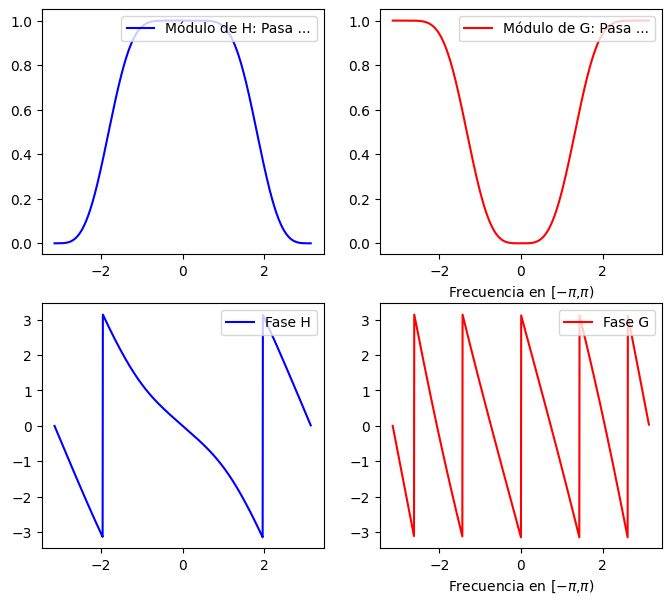

In [18]:
#primero encontramos los coeficientes del filtro
#si la longitud deseada es 8=2*p, entonces el nivel de la ondita debe ser p=8/2. O sea dB4.
h=daub(4) #asociado a la escala, pasa-bajo
g=qmf(h) #asociado a la ondita, pasa-alto

#haremos convolución con estos coeficientes (filtraremos con ellos)
#Veamos como se comportan en frecuencia
 
#Transformamos y centramos
N = 1024 #longitud de un posible segmento o señal para analizar (señal o segmento con N muestras)

H = fft(h, N) 
#DFT punto K, para estudiar el efecto, 
#como cuando veíamos el efecto en frecuencia de las ventanas de la STFT
G  = fft(g, N) 
HC = fftshift(H)
GC = fftshift(G)

#Graficamos módulo y fase de las transformadas

frecc = np.arange(-np.pi, np.pi, 2*np.pi/N) #frec norm. y centradas en 0, van en [-pi, pi)

plt.figure(figsize=(8,7))
plt.subplot(221)
plt.plot(frecc, np.abs(HC/max(HC)), color='blue', label='Módulo de H: Pasa ...')
plt.legend(loc='upper right')

plt.subplot(222)
plt.plot(frecc, np.abs(GC/max(GC)), color='red', label='Módulo de G: Pasa ...')
plt.legend(loc='upper right')
plt.xlabel('Frecuencia en [$-\pi$,$\pi$)')

plt.subplot(223)
plt.plot(frecc, np.angle(HC, deg=False), color='blue', label='Fase H') 
#deg=False para radianes en ordenadas y deg=True para degrees ordenadas
plt.legend(loc='upper right')

plt.subplot(224)
plt.plot(frecc, np.angle(GC, deg=False), color='red', label='Fase G')
plt.legend(loc='upper right')
plt.xlabel('Frecuencia en [$-\pi$,$\pi$)')
plt.show()


https://quizizz.com/admin/presentation/644196a1ffe00b001dc84990?source=lesson_share.



# Transformada Ondita Discreta: DWT

A diferencia de la Transformada ondita continua, la Transformada Ondita Discreta (dwt) no tiene redundancias y es más adecuada para el estudio digital. 


## DWT: Transformada Ondita Discreta
(ver pág. 152-154 del Apunte_oficial_PS.pdf, 127-129 del papel) hasta esquema de descomposición. 

### Ejercicio 3

Dada una señal descomponer la señal en aproximaciones y detalles utilizando la transformada Ondita Discreta (dwt), con dos onditas diferentes cada uno (Haar y Symlets por ejemplo).

Los nombres de las onditas se pueden ver acá:

https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html

Con la función:  
**print(pywt.wavelist(kind='discrete'))**  
podriamos ver un listado de onditas discretas


**Descomponemos la señal de audio 'audiolab1.wav en aproximaciones y detalles utilizando la Transformada Ondita Discreta con ondita "haar"**

(44100, array([[  1,   1],
       [  1,   1],
       [  1,   1],
       ...,
       [  3,   3],
       [ -8,  -8],
       [-13, -13]], dtype=int16))
matriz con dos columnas: [[  1   1]
 [  1   1]
 [  1   1]
 ...
 [  3   3]
 [ -8  -8]
 [-13 -13]]
vector: [  1   1   1 ...   3  -8 -13]


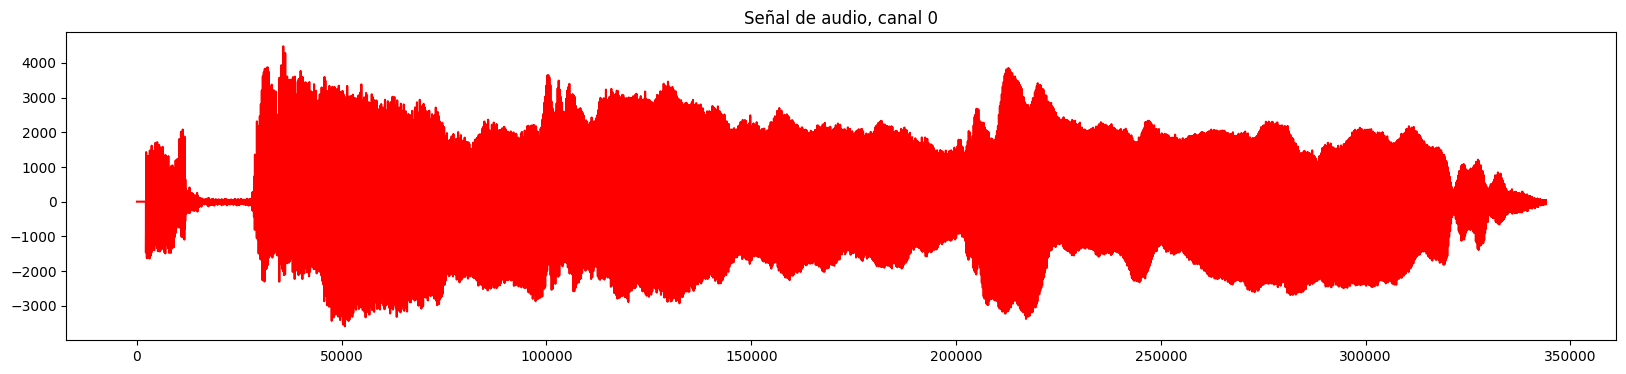

In [21]:
au2=read('../audiosLAB4/audiolab1.wav')
print (au2) #terna
matriz=au2[1] #matriz de datos, con dos colmnas, una por cada canal
A2=matriz[:,0] #primer canal columna 0, vector de datos
print('matriz con dos columnas:', matriz)
print('vector:',A2)

plt.figure(figsize=(20,4))
plt.plot(A2, color='red')
plt.title("Señal de audio, canal 0")
plt.show()

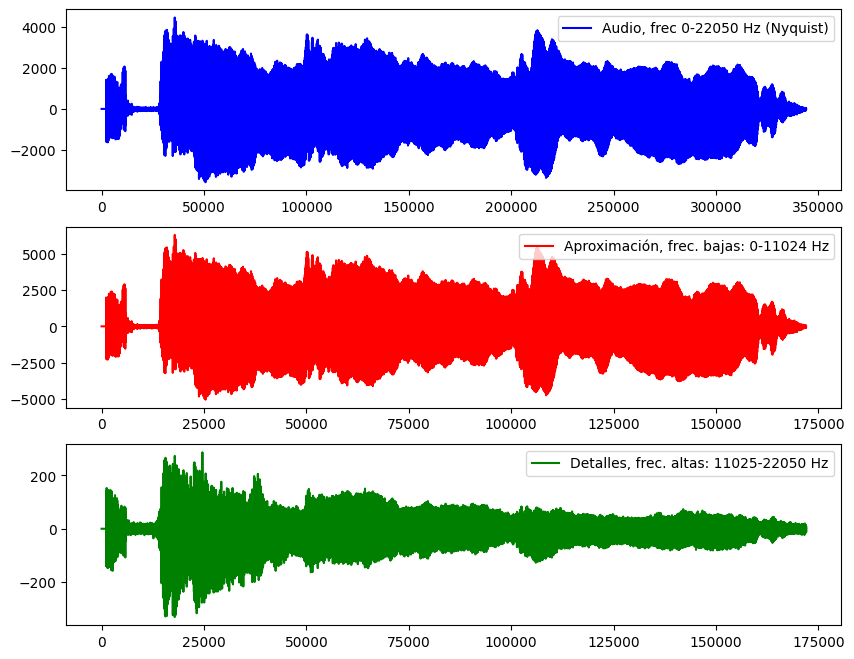

NOTAR LAS DIFERENCIAS DE LONGITUD
Notar que los Detalles y Alta Frecuencia están asociados al ruido, suelen tener menor amplitud


In [22]:
#calculo la transformada ondita discreta con dwt con ondita haar
#a[n]=(x*h)[2n] conv filtro pasa bajo y submuestreo
#d[n]=(x*g)[2n] conv filtro pasa alto  y submuestreo

#Aquí cA es la aproximación (baja frecuencia) y d es el detalle (alta frecuencia)
cA_h, cD_h = pywt.dwt(A2, 'haar')

plt.figure(figsize=(10,8))
plt.subplot(311)
plt.plot(A2, color='blue', label='Audio, frec 0-22050 Hz (Nyquist)')
plt.legend(loc='upper right')
plt.subplot(312)
plt.plot(cA_h, color='red', label='Aproximación, frec. bajas: 0-11024 Hz')
plt.legend(loc='upper right')
plt.subplot(313)
plt.plot(cD_h, color='green', label='Detalles, frec. altas: 11025-22050 Hz') 
plt.legend(loc='upper right')
plt.show()
print('NOTAR LAS DIFERENCIAS DE LONGITUD')
print('Notar que los Detalles y Alta Frecuencia están asociados al ruido, suelen tener menor amplitud')

**Descomponemos la señal en aproximaciones y detalles utilizando la Transformada Ondita Discreta con ondita "symlets"**

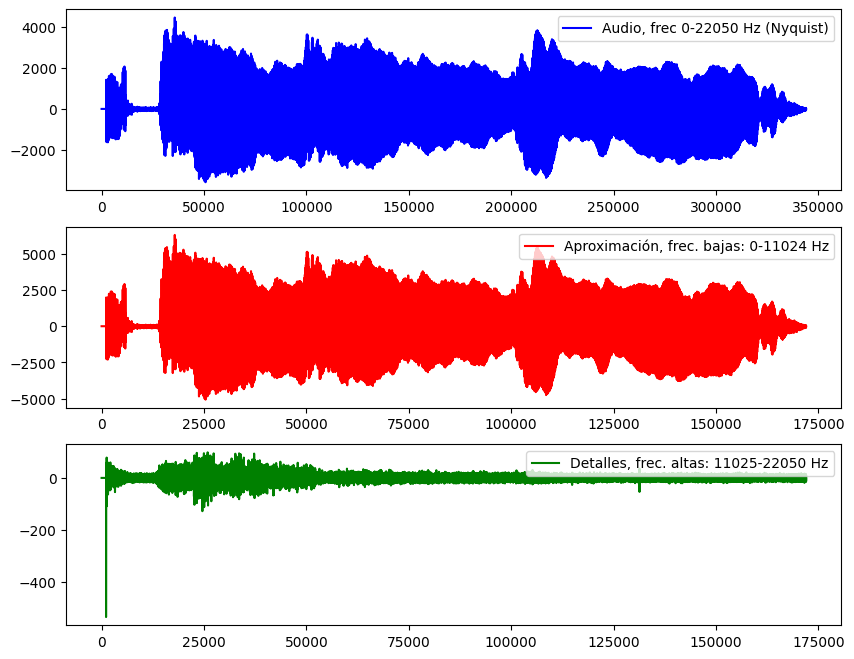

In [23]:
cA_s, cD_s = pywt.dwt(A2, 'sym2')

plt.figure(figsize=(10,8))
plt.subplot(311)
plt.plot(A2, color='blue', label='Audio, frec 0-22050 Hz (Nyquist)')
plt.legend(loc='upper right')
plt.subplot(312)
plt.plot(cA_s, color='red', label='Aproximación, frec. bajas: 0-11024 Hz')
plt.legend(loc='upper right')
plt.subplot(313)
plt.plot(cD_s, color='green', label='Detalles, frec. altas: 11025-22050 Hz')
plt.legend(loc='upper right')
plt.show()

**Descomponemos la señal en aproximaciones y detalles en 6 niveles con ondita "haar"**

Una motivación de la necesidad o utilidad de la descomposición

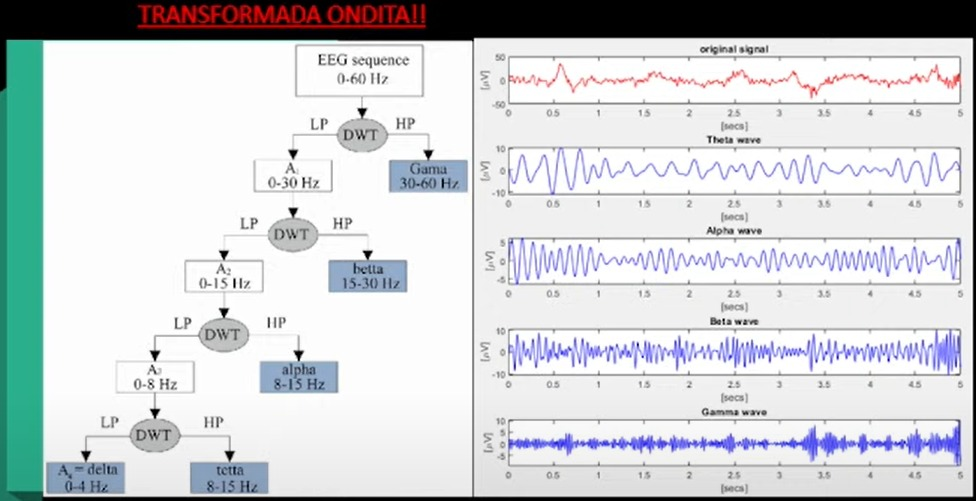

### Ejercicio 4

a) Dada una señal descomponer la señal en aproximaciones y detalles utilizando la transformada Ondita Discreta (dwt), con 2 niveles y luego con 6 niveles. Cada descomposicion dos onditas diferentes (Haar y Symlets por ejemplo).



## b)
Agregar en la grafica el rango de frecuencias de la aproximacion y de cada detalle

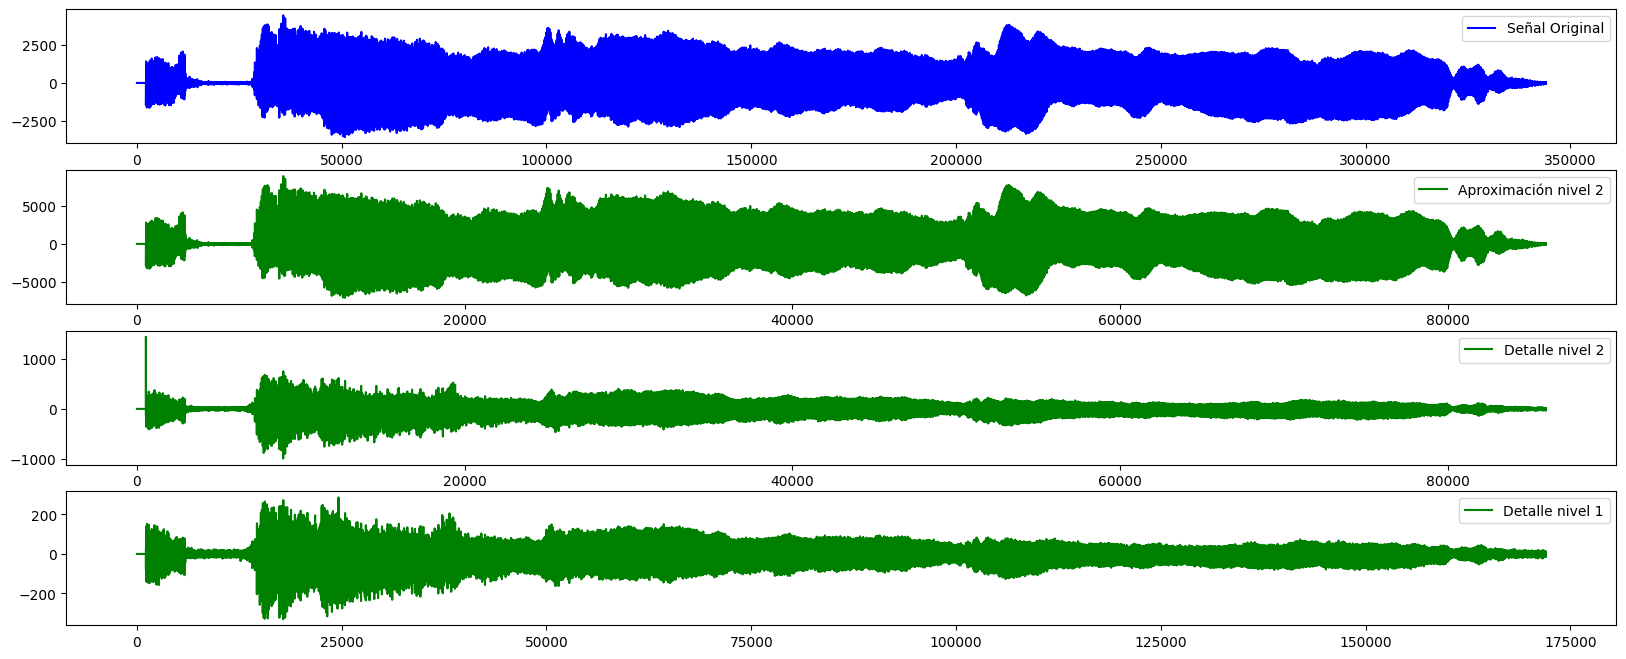

In [24]:
#Para obtener los coeficientes de la descomposición en aproximación y detalles
#de una señal usando una ondita determinada, se usa el comando wavedec:
#tenemos la descomposición en 6 pasos/niveles:

[a2, d2, d1] = pywt.wavedec(A2, 'haar',level=2) #level=6 es la cantidad de niveles de descomposición


#Observar que la cant. de muestras de los niveles aumentan  multiplicándose por 2 (aprox)

plt.figure(figsize=(20,8))
plt.subplot(411)
plt.plot(A2, color='blue', label='Señal Original')
plt.legend(loc='upper right')

plt.subplot(412)
plt.plot(a2, color='green', label='Aproximación nivel 2') 
plt.legend(loc='upper right')

plt.subplot(413)
plt.plot(d2, color='green', label='Detalle nivel 2') 
plt.legend(loc='upper right')
plt.subplot(414)
plt.plot(d1, color='green', label='Detalle nivel 1') 
plt.legend(loc='upper right')
plt.show()

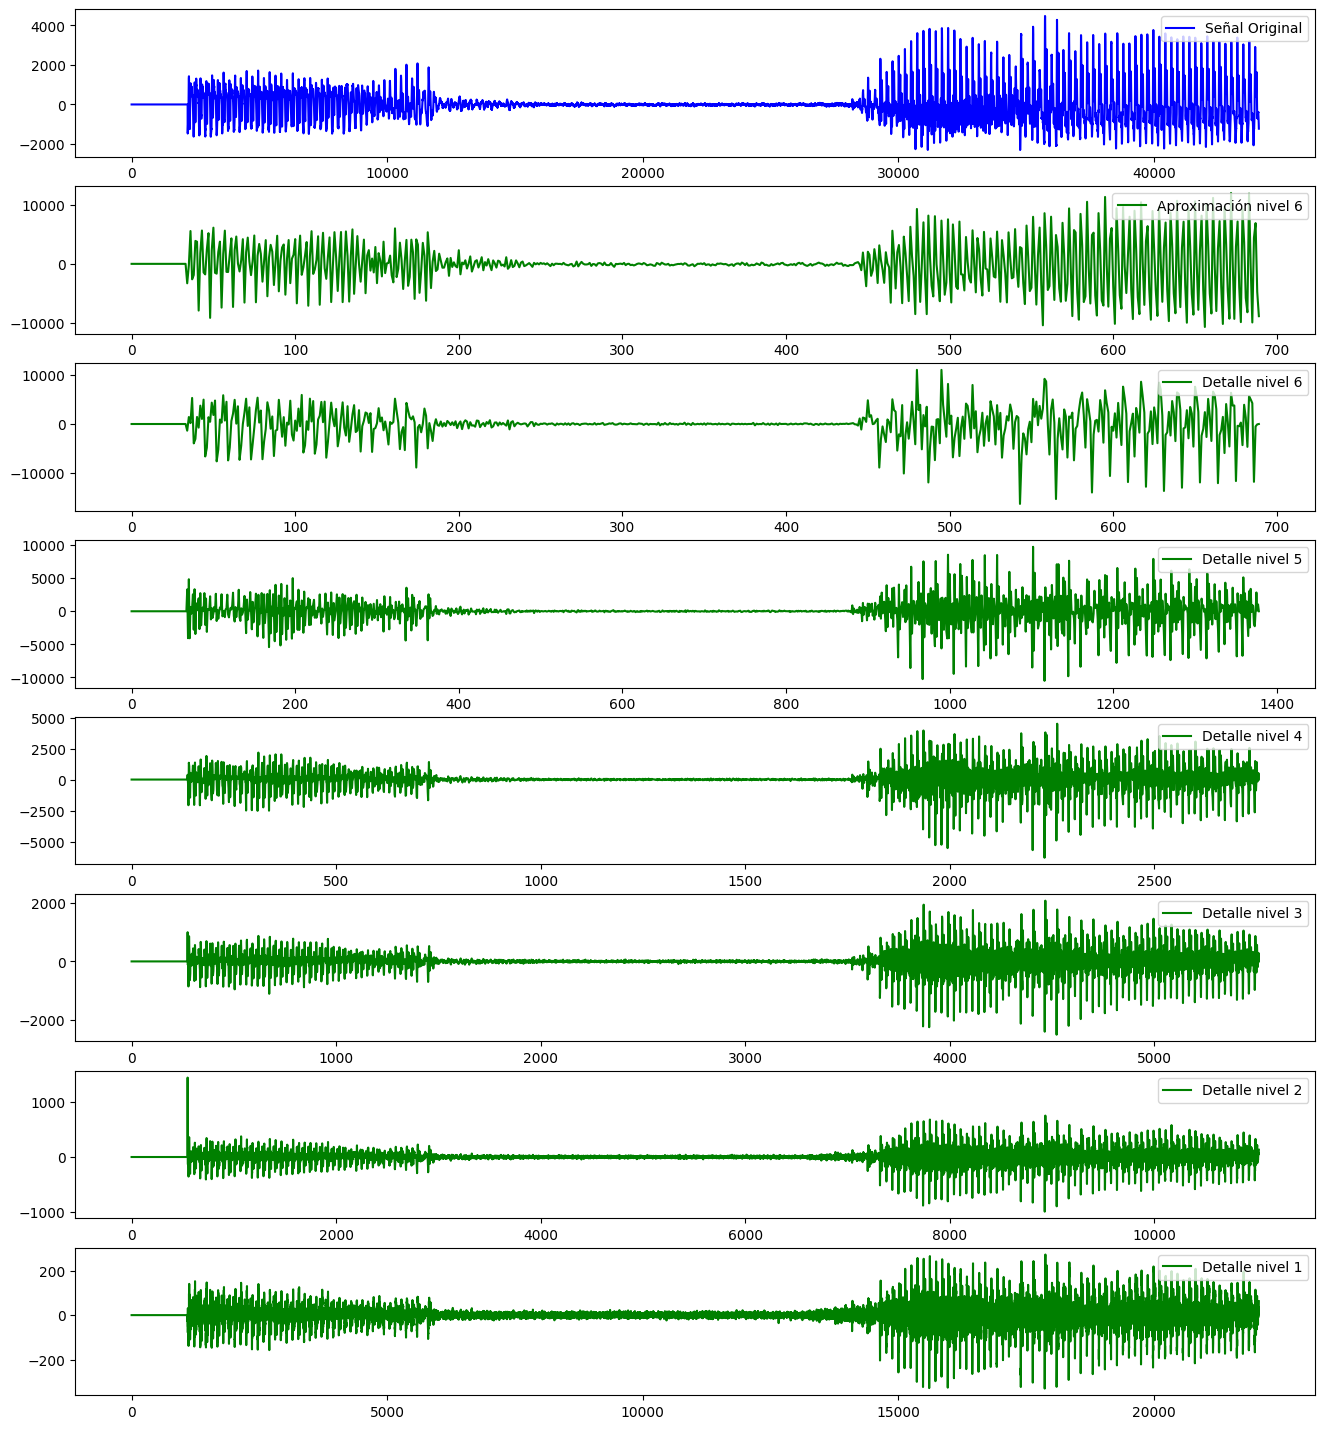

In [25]:
#Para obtener los coeficientes de la descomposición en aproximación y detalles
#de una señal usando una ondita determinada, se usa el comando wavedec:
#tenemos la descomposición en 6 pasos/niveles:

primerseg=A2[:44100]# primer segundo de la señal A2
[a6, d6, d5, d4, d3, d2, d1] = pywt.wavedec(primerseg, 'haar',level=6) #level=6 es la cantidad de niveles de descomposición

#Observar que la cant. de muestras de los niveles aumentan  multiplicándose por 2 (aprox)

plt.figure(figsize=(16,18))
plt.subplot(811)
plt.plot(primerseg, color='blue', label='Señal Original')
plt.legend(loc='upper right')

plt.subplot(812)
plt.plot(a6, color='green', label='Aproximación nivel 6') 
plt.legend(loc='upper right')

plt.subplot(813)
plt.plot(d6, color='green', label='Detalle nivel 6') 
plt.legend(loc='upper right')
plt.subplot(814)
plt.plot(d5, color='green', label='Detalle nivel 5') 
plt.legend(loc='upper right')

plt.subplot(815)
plt.plot(d4, color='green', label='Detalle nivel 4') 
plt.legend(loc='upper right')
plt.subplot(816)
plt.plot(d3, color='green', label='Detalle nivel 3') 
plt.legend(loc='upper right')

plt.subplot(817)
plt.plot(d2, color='green', label='Detalle nivel 2') 
plt.legend(loc='upper right')
plt.subplot(818)
plt.plot(d1, color='green', label='Detalle nivel 1') 
plt.legend(loc='upper right')
plt.show()


### Ejercicio 5 (para la casa)
Descomponer la señal chirp o audio de su producción en aproximaciones y detalles utilizando la Transformada Ondita Discreta con ondita "haar" y algunos niveles de descomposicion, agregar rangos de frecuencias.